In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import networkx as nx
import psycopg2
import psycopg2.extras
import pandas as pd
def pg_get_conn(database="fakenews", user="fakenews", password="fnd"):
    """Get Postgres connection for fakenews

    Returns:
        Connection object : returns Post gres connection object

    Args:
        database (str, optional): Name of database
        user (str, optional): Name of User
        password (str, optional): Password of user
    """
    try:
        conn = psycopg2.connect(database=database,
                                user=user, password=password, host='localhost', port='5432')
        return conn
    except Exception as e:
        print(str(e))
        
def get_next_level_handles(rt=True,table="tweet_articles_tweepy"):
    with pg_get_conn(database="abhishek",user="abhishek",password="vaishu") as conn:
        cur = conn.cursor()
        if rt:
            cur.execute("""Select retweeted_status_user_handle from """+table)
        else:
            cur.execute("""Select * from """+table)
        ans = cur.fetchall()
    lse = set(x[0].replace("{","").replace("}","") for x in ans) if not rt else set(x[0] for x in ans)
    ans_handles=[]
    if not rt:
        for x in lse:
            for y in x.split(","):
                if y != '':
                    ans_handles.append(y)
    else:
        ans_handles = list(lse)
    return(ans_handles)

def run_query(query="""Select * from tweets_cleaned""", realDict = False):
    print(query)
    with pg_get_conn(database="abhishek",user="abhishek",password="vaishu") as conn:
        cur = conn.cursor(cursor_factory = psycopg2.extras.RealDictCursor) if realDict else conn.cursor()
        cur.execute(query)
        ans = cur.fetchall()
        return(ans)
def write_next_handles(new_handles):
    path_old_file = '/home/abhishek/Documents/TweetCrawlMultiThreaded/handles.txt'
    old_handles = set()
    with open(path_old_file) as o_handles:
        for o_handle in o_handles:
            if o_handle.startswith('@'):
                o_handle = o_handle.replace('@','')
            old_handles.add(o_handle)
    new_handles = set(new_handles)
    next_level_handles = new_handles.difference(old_handles)
    with open(path_old_file+".bk", 'a') as f:
        for item in old_handles:
            f.write("%s\n" % item)
    with open(path_old_file, 'w') as f:
        for item in next_level_handles:
            f.write("%s\n" % item)

def create_graph(ls_tup):
    G = nx.DiGraph()
    for dc in ls_tup:
        tfrom=dc['tweet_from']
        rt = dc['retweeted_status_user_handle']
        if G.has_edge(tfrom,rt):
            G[tfrom][rt]['weight'] += 1
        else:
            G.add_edge(tfrom,rt,weight=1)
    return(G)

def plot_word_cloud(word_freq_dict,background_color="white", width=800, height=1000,max_words=300, figsize=(50, 50)):
    """
    Display the Word Cloud using Matplotlib
    :param word_freq_dict: Dictionary of word frequencies
    :type word_freq_dict: Dict
    :return: None
    :rtype: None
    """
    word_cloud = WordCloud(background_color=background_color, width=width, height=height,
                           max_words=max_words).generate_from_frequencies(frequencies=word_freq_dict)
    plt.figure(figsize=figsize)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [2]:
n_hand = run_query(query="""select * from tweets_cleaned limit 1000000""")
len(n_hand)

select * from tweets_cleaned limit 1000000


1000000

In [3]:
import pandas as pd
df = pd.DataFrame(n_hand)
df['created_at'] =  pd.to_datetime(df['created_at'])

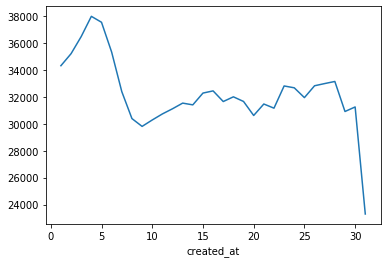

In [4]:
import matplotlib
df.groupby(df.created_at.dt.day).count().id.plot()

In [1]:

from pyspark.sql import SparkSession
# $example on:schema_merging$
from pyspark.sql import Row
# $example off:schema_merging$

In [2]:
spark = SparkSession.builder.appName("Python Spark SQL data source example")
spark.config('spark.executor.memory', '24g')
spark.config('spark.driver.memory','24g')
spark.config('spark.driver.maxResultSize','24g')
spark.config('spark.executor.heartbeatInterval','1000000')
spark.config('spark.network.timeout','1200000')
spark.config('spark.shuffle.partitions', 1000)
spark = spark.getOrCreate()

In [3]:
spark.sparkContext.getConf().getAll()

[('spark.executor.memory', '24g'),
 ('spark.driver.memory', '24g'),
 ('spark.executor.heartbeatInterval', '1000000'),
 ('spark.driver.maxResultSize', '24g'),
 ('spark.driver.host', '192.168.1.2'),
 ('spark.shuffle.partitions', '1000'),
 ('spark.executor.id', 'driver'),
 ('spark.app.name', 'Python Spark SQL data source example'),
 ('spark.driver.port', '36513'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.submit.deployMode', 'client'),
 ('spark.app.id', 'local-1581861965677'),
 ('spark.network.timeout', '1200000'),
 ('spark.ui.showConsoleProgress', 'true')]

In [4]:
# df = spark.read.jdbc("jdbc:postgresql://localhost:5432/abhishek","tweets_cleaned",properties={"user":"abhishek","password":"vaishu"})
df2 = spark.read.format("jdbc").option("url","jdbc:postgresql://localhost:5432/abhishek").option("dbtable","tweets_cleaned")
df2 = df2.option("user","abhishek").option("password","vaishu").option("numPartitions","20")
df2 = df2.load()

In [9]:
rdd = df2.rdd.flatMap(lambda x: enumerate(x)).partitionBy(20)

In [6]:
df2.head()

KeyboardInterrupt: 

In [4]:
ls_tup = run_query("select tweet_from,retweeted_status_user_handle from tweets_cleaned where retweeted_status_user_name is not null")

select tweet_from,retweeted_status_user_handle from tweets_cleaned where retweeted_status_user_name is not null


In [19]:
nx.write_gexf(G,"First")

In [ ]:
import pandas as pd
ls = run_query("""Select * from non_text_cleaned_time""")
df = pd.DataFrame(ls ,columns = ["time","handle","mentions","retweets","cluster","importance","hashtags"])

Select * from non_text_cleaned_time


In [4]:
df.to_pickle("mention_retweet_hastags.pkl")

In [5]:
df  =  pd.read_pickle("mention_retweet_hastags.pkl")

In [6]:
df.head(5)

,handle,mentions,retweets,cluster,importance,hashtags
0,phumaoenix,,None,1,490,
1,JPFurlong,,None,91,395,
2,phumaoenix,,None,1,490,
3,phumaoenix,,None,1,490,"BhagodaKejri,sheiladikshit"
4,JPFurlong,globebusiness,globebusiness,91,395,


In [7]:
from collections import Counter
import string
# from nltk.corpus import stopwords 
def __custom_words_accumulator(series):
    c = Counter()
    for sentence in series:
        if sentence:
#             sentence = sentence.lower()  # Convert all text to lower case
#             sentence = sentence.translate(str.maketrans('', '', string.punctuation))  # Remove punctuations
            sent_list = sentence.split(",")
            c.update(sent_list)
    return c.most_common()


wf = df.groupby("cluster")["hashtags"].apply(__custom_words_accumulator)


In [8]:
print(wf[0][:50],wf[1][:50])


[('IndiaSupportsCAA', 23246), ('CAA', 18814), ('India', 15408), ('MannKiBaat', 9442), ('Kashmir', 8858), ('Pakistan', 8508), ('BJP', 8485), ('ShaheenBagh', 8176), ('WATCH', 6924), ('JNU', 6449), ('Delhi', 6236), ('IndianArmy', 5392), ('China', 5241), ('SwachhBharat', 5136), ('Chandrayaan2', 5107), ('LokSabhaElections2019', 5035), ('BREAKING', 5007), ('Congress', 5007), ('MainBhiChowkidar', 4862), ('NRC', 4605), ('Budget2020', 4584), ('TransformingIndia', 4567), ('TeamIndia', 4315), ('RepublicDay', 4296), ('HowdyModi', 4197), ('NewProfilePic', 4167), ('NewIndia', 4016), ('Article370', 3893), ('UrbanNaxals', 3830), ('Maharashtra', 3784), ('MyCleanIndia', 3758), ('Breaking', 3642), ('Modi', 3619), ('ISRO', 3609), ('DelhiElections2020', 3581), ('RahulGandhi', 3557), ('CAB', 3545), ('JammuAndKashmir', 3522), ('PhirEkBaarModiSarkar', 3486), ('CWC19', 3469), ('NarendraModi', 3407), ('CAA2019', 3288), ('MangoNews', 3205), ('ISupportCAA_NRC', 3100), ('CottonIsCool', 3100), ('JaiHind', 3098), ('

In [2]:
wc_dict = pd.DataFrame(wf[1],columns=["handle","freq"])
dct = wc_dict.set_index("handle").to_dict()['freq']
plot_word_cloud(dct

SyntaxError: unexpected EOF while parsing (<ipython-input-2-b05ceeed03c0>, line 3)

In [48]:
wf = wf.reset_index()

In [66]:
wf2

,cluster_id,handle,noOfX
0,0,narendramodi,133692
0,0,BJP4India,68838
0,0,AmitShah,37880
0,0,ANI,33894
0,0,TajinderBagga,29619
...,...,...,...
17,91,JudyGoss,369
17,91,KineticaHQ,368
17,91,WiproDigital,366
17,91,mitsmr,366


In [9]:
import numpy as np
def split_list(series,handleBool=True):
    handles = []
    listNoOfX = []
    for groupList in series:
        for handle,x in groupList:
#             print(handle,x)
            handles.append(handle)
            listNoOfX.append(x)
#     print(listNoOfX)
    if handleBool :
        print("handle")
        return(handles)
    else:
        print("listof")
        return(listNoOfX)
        
wf2 = pd.DataFrame({
    'cluster_id' : np.repeat(wf['cluster'],50),
    'handle': split_list(wf['retweets'],True),
    'noOfX': split_list(wf['retweets'],handleBool=False)
})

KeyError: 'cluster'

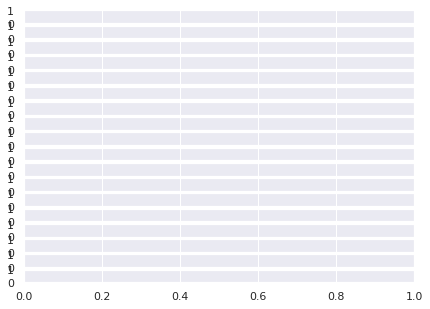

In [65]:
import matplotlib.pyplot as plt
clusters = wf2.cluster_id.unique()


In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize': (40,10)})
i = 0
f, ax = plt.subplots(len(clusters), 1, figsize=(40, 100))
f.tight_layout(pad=6.0)
for cid in clusters:
    g = sns.barplot(x="handle", y="noOfX", hue="cluster_id", data=wf2[wf2.cluster_id==cid],ax=ax[i])
    g.set_xticklabels(g.get_xticklabels(), rotation=50, horizontalalignment='right')
    i+=1

In [30]:
wf2 = wf.reset_index()
wf2[["imp1","imp2","imp3","imp4","imp5"]] = pd.DataFrame(wf2.retweets.values.tolist(), index=wf2.index)

ValueError: Columns must be same length as key

In [10]:
wf2

NameError: name 'wf2' is not defined

In [33]:
df_bjp = pd.DataFrame(wf[1],columns=["handle","mentions"])

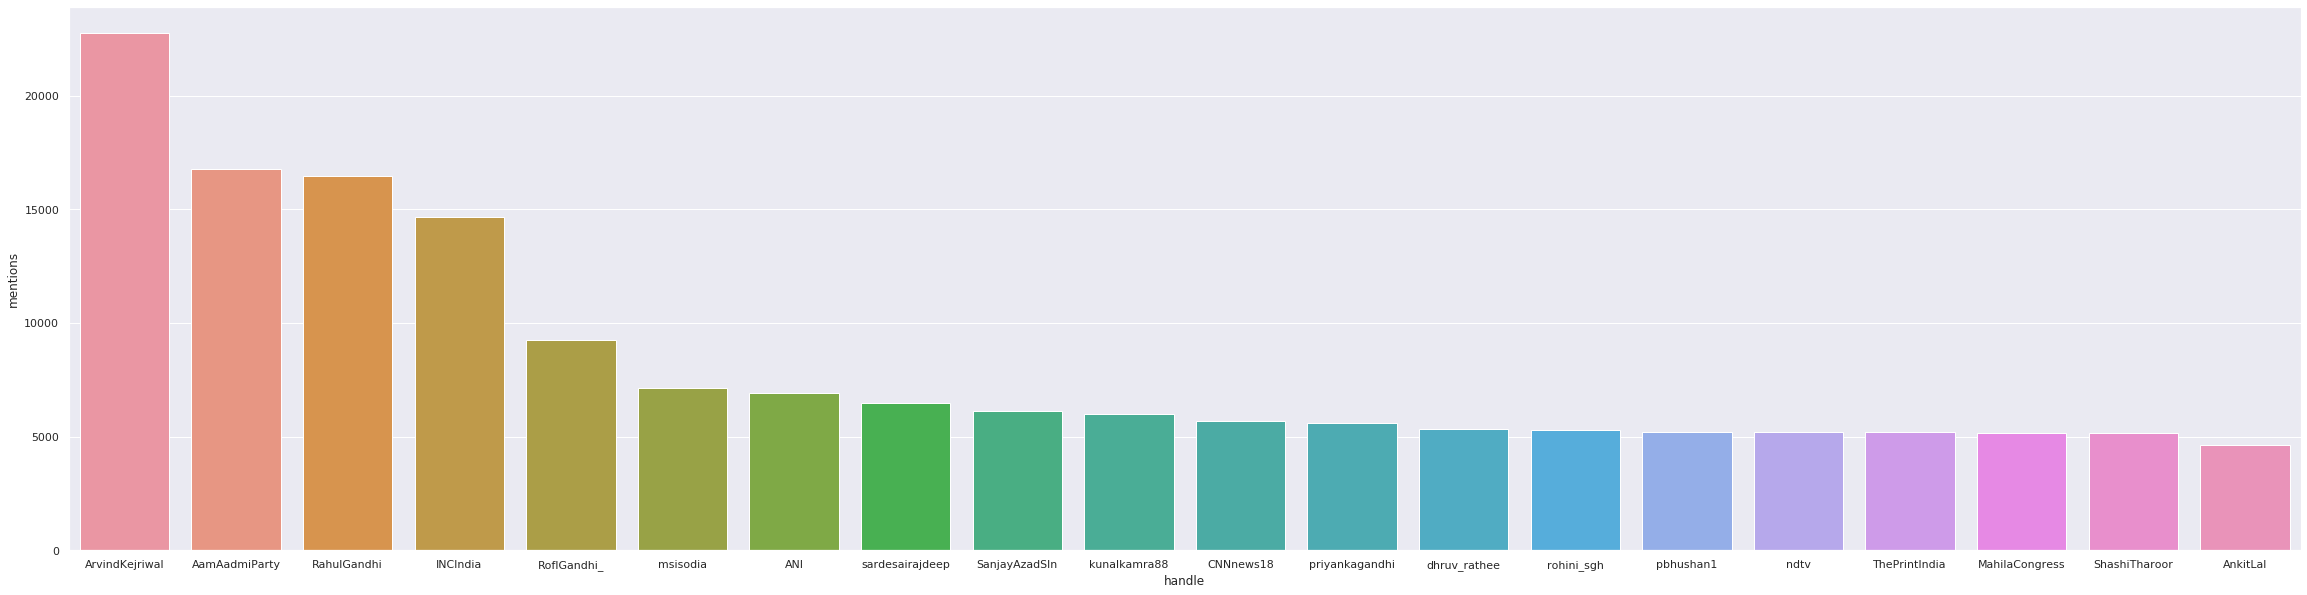

In [34]:
import matplotlib as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (40,10)})
sns.barplot(x="handle",y="mentions",data=df_bjp[0:20])

In [39]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def plot_word_cloud(word_freq_dict,background_color="white", width=800, height=1000,max_words=300, figsize=(50, 50)):
    """
    Display the Word Cloud using Matplotlib
    :param word_freq_dict: Dictionary of word frequencies
    :type word_freq_dict: Dict
    :return: None
    :rtype: None
    """
    word_cloud = WordCloud(background_color=background_color, width=width, height=height,
                           max_words=max_words).generate_from_frequencies(frequencies=word_freq_dict)
    plt.figure(figsize=figsize)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
df_bjp = df_bjp.set_index("handle")
dct = df_bjp[:100].to_dict()
plot_word_cloud(dct['mentions'])

{'narendramodi': 450447,
 'BJP4India': 166741,
 'AmitShah': 152910,
 'PMOIndia': 84858,
 'ArvindKejriwal': 67572,
 'RahulGandhi': 67536,
 'INCIndia': 61059,
 'ANI': 60815,
 'TajinderBagga': 57294,
 'Swamy39': 55778,
 'myogiadityanath': 51966,
 'KapilMishra_IND': 43007,
 'aajtak': 39487,
 'PiyushGoyal': 35313,
 'TimesNow': 34293,
 'ShefVaidya': 33681,
 'vivekagnihotri': 33579,
 'sardanarohit': 31139,
 'ChouhanShivraj': 30037,
 'ZeeNewsHindi': 29396,
 'republic': 27554,
 'Dev_Fadnavis': 27188,
 'JPNadda': 25527,
 'BDUTT': 24627,
 'sambitswaraj': 24598,
 'ippatel': 23484,
 'sardesairajdeep': 23064,
 'nsitharaman': 23014,
 'IndiaToday': 22944,
 'rajnathsingh': 22792,
 'smritiirani': 22691,
 'sudhirchaudhary': 22499,
 'BJP4Delhi': 21830,
 'TarekFatah': 21336,
 'AskAnshul': 20483,
 'ndtv': 19230,
 'Uppolice': 19075,
 'OpIndia_com': 18667,
 'rishibagree': 18247,
 'DrKumarVishwas': 18214,
 'ZeeNews': 18207,
 'Real_Anuj': 18075,
 'MajorPoonia': 17794,
 'amitmalviya': 17514,
 'ManojTiwariMP': 17

In [37]:
df_bjp

,mentions
handle,
narendramodi,450447
BJP4India,166741
AmitShah,152910
PMOIndia,84858
ArvindKejriwal,67572
...,...
_jgranger,1
JustDoBig,1
Radeon,1
